# Tesla Stock Price Forecasting using RNN (LSTM) and different machine learning algorithms

In this project different machine learning model and different RNN model are used to forecast Tesla stock price. This is a regression problem, the output of the model is future prices of the stock.

Data set we used contains 5 features, Open, Close, High, Low and Volume, but we just use some of the features.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import seaborn as sns
import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

Using TensorFlow backend.


In [3]:
df=pd.read_csv("C://Users//Desktop//Dataset//4538_7213_bundle_archive//Data//Stocks//tsla.txt")

# Exploring Data


In [4]:
df.head() 

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [5]:
(df==0).all()

Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt     True
dtype: bool

In [6]:
df.drop(['OpenInt'],axis=1, inplace=True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-28,17.00,17.00,17.00,17.00,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276
2,2010-06-30,25.79,30.42,23.30,23.83,17194394
3,2010-07-01,25.00,25.92,20.27,21.96,8229863
4,2010-07-02,23.00,23.10,18.71,19.20,5141807


# Check to see if there there are zero values in Data Frame, and remove them
We replace the zero with no.NaN and the drop the NaNs

In [8]:
df.eq(0).any().any()


True

In [9]:
df = df.replace(0,np.NaN)

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-28,17.00,17.00,17.00,17.00,NaN
1,2010-06-29,19.00,25.00,17.54,23.89,18783276.0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394.0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863.0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807.0


In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume
1,2010-06-29,19.00,25.00,17.54,23.89,18783276.0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394.0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863.0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807.0
5,2010-07-06,20.00,20.00,15.83,16.11,6879296.0


In [13]:
(df==0).all()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [14]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Check if There are some Outliers

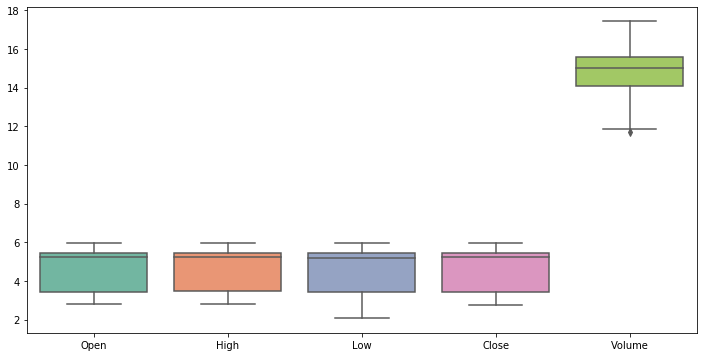

In [15]:
Scaled_df= np.log(df[['Open', 'High','Low', 'Close', 'Volume']])
plt.figure(figsize = (12,6))
_ = sns.boxplot(data=Scaled_df, palette="Set2")

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
1,2010-06-29,19.00,25.00,17.54,23.89,18783276.0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394.0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863.0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807.0
5,2010-07-06,20.00,20.00,15.83,16.11,6879296.0


In [17]:
df.describe()

,Open,High,Low,Close,Volume
count,1857.000000,1857.000000,1857.000000,1857.000000,1.857000e+03
mean,150.461572,152.971919,147.758439,150.426859,4.418886e+06
std,107.055727,108.473440,105.466437,107.007780,4.244199e+06
min,16.140000,16.630000,8.030000,15.800000,1.186140e+05
25%,31.010000,31.740000,30.300000,31.150000,1.283985e+06
50%,184.480000,188.790000,181.500000,185.000000,3.422342e+06
75%,231.490000,235.390000,227.810000,230.970000,5.919366e+06
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07


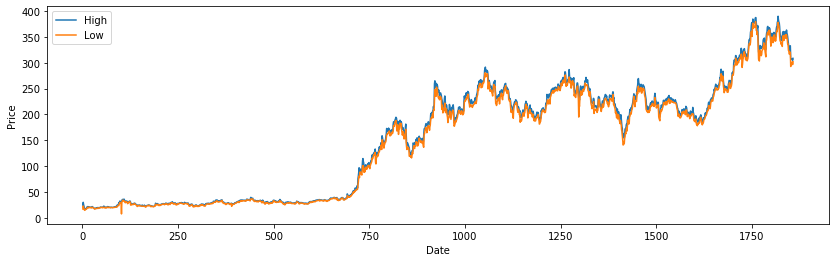

In [18]:
plt.figure(figsize=(14,4))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(["High", "Low"])

# Splitting Data to Training set and Test Set

In [19]:

def split_df(dataframe, Threshold, Feat):
    TrainDf=dataframe.loc[:Threshold,Feat]
    TestDf=dataframe.loc[Threshold:,Feat]
    return(TrainDf,TestDf)
PCT=0.7
TrainDf,TestDf=split_df(df,(int(len(df)*PCT)),["Open","Close"])

In [20]:
TrainDf.head()

,Open,Close
1,19.00,23.89
2,25.79,23.83
3,25.00,21.96
4,23.00,19.20
5,20.00,16.11


In [21]:
TestDf.head()

,Open,Close
1299,227.93,224.84
1300,231.00,242.99
1301,241.86,248.48
1302,245.62,249.06
1303,240.34,238.63


In [22]:
print("Len df is: ", len(df),", len Training set is: ", len(TrainDf) ,", len Test set is: ",  len(TestDf))

Len df is:  1857 , len Training set is:  1299 , len Test set is:  559


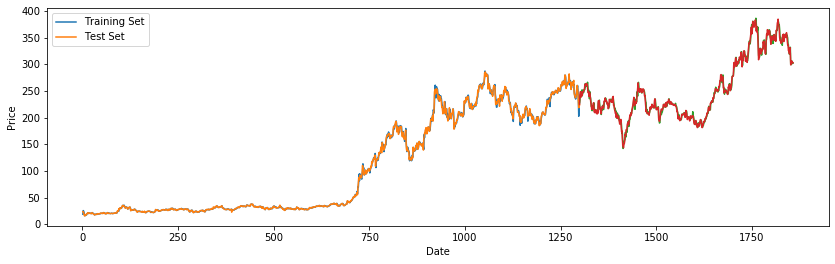

In [23]:
plt.figure(figsize=(14,4))
plt.plot(TrainDf)
plt.plot(TestDf)
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(["Training Set", "Test Set"])


# Data Normalization
inorder to encorage the generalization of the model and avoid overfitting we normalize the data

In [24]:
SC= MinMaxScaler(feature_range=(0,1))

SC_train= SC.fit_transform(np.array(TrainDf))
SC_test= SC.fit_transform(np.array(TestDf))

YSC_train=SC.fit_transform(np.array(TrainDf.drop(['Open'],axis=1)))
YSC_test= SC.fit_transform(np.array(TestDf.drop(['Open'],axis=1)))


# Generating Sequences for traning the model

Here we generate sequences of data taken from df.Open and df.Close

Successive sequences of df.Open and df.Close with the lenght timeStamp as X_train and the df.Close data after each sequence as a y_train.

Figure below depict how we generate X_train and y_train from just df.Close.

Figure below depict how we generate X_train and y_train
timeStamp=5


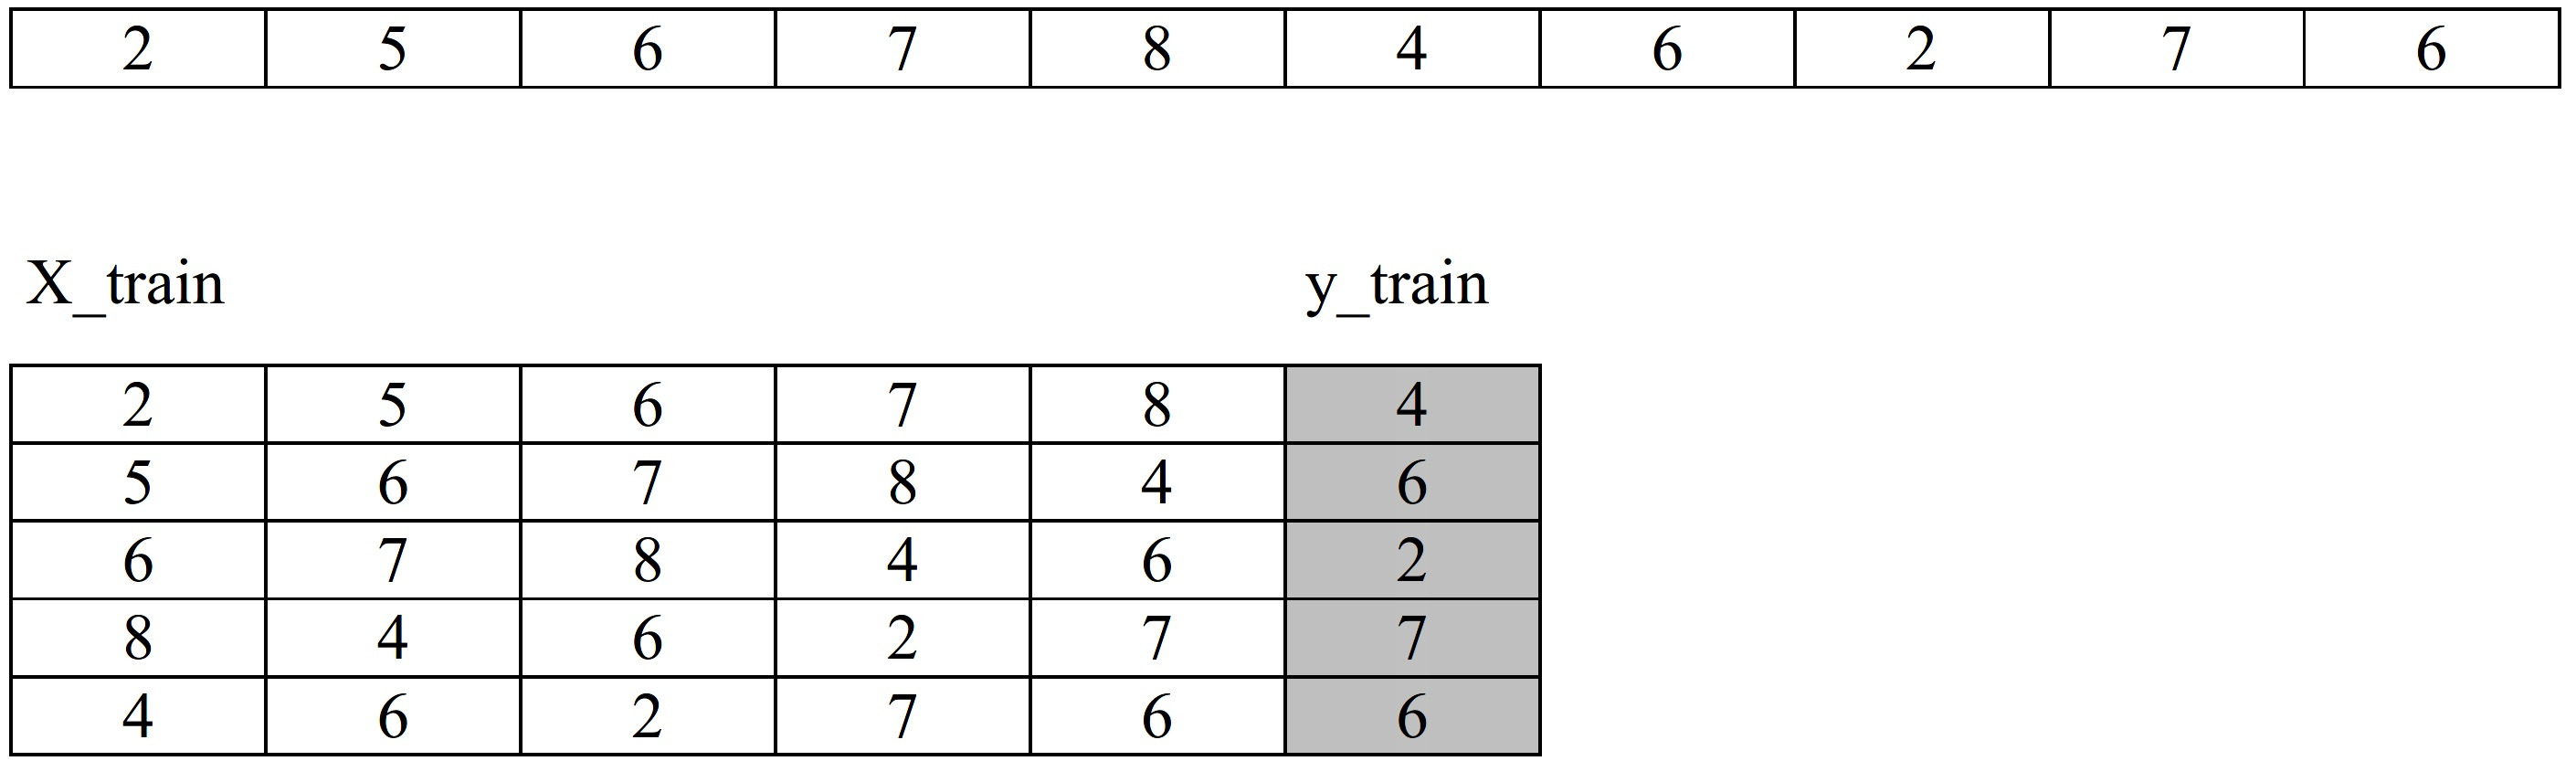

In [46]:
print("Figure below depict how we generate X_train and y_train")
print("timeStamp=5")
from IPython.display import Image
Image("C://Users//bidar20m//Desktop//ax.jpg")

In [47]:
X_train = []
y_train = []

lengthTr = len(TrainDf)
timeStamp=80
for i in range(timeStamp,lengthTr):
    X_train.append(SC_train[i-timeStamp:i])
    y_train.append(YSC_train[i])

X_train=np.array(X_train)
y_train=np.array(y_train)


X_test = []
y_test = [] 

lengthTe = len(TestDf)
for i in range(timeStamp, lengthTe):
    X_test.append(SC_test[i-timeStamp:i])
    y_test.append(YSC_test[i])

X_test=np.array(X_test)
y_test=np.array(y_test)

# Designing NN Models for Stock Price Prediction

# Models: 
 1. LSTM
 2. GRU
 3. MLP

 

# 1. LSTM model
LSTM is used here to detect long term dependencies

In [48]:
# The LSTM architecture
model = Sequential([
                    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],2)),
                    Dropout(0.5),

                    keras.layers.LSTM(units=40, return_sequences=True),
                    Dropout(0.5),

                    keras.layers.LSTM(units=40, return_sequences=True),
                    Dropout(0.5),

                    keras.layers.LSTM(units=40),
                    Dropout(0.5),

                    keras.layers.Dense(units=1),
                   ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 80, 50)            10600     
_________________________________________________________________
dropout_9 (Dropout)          (None, 80, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 80, 40)            14560     
_________________________________________________________________
dropout_10 (Dropout)         (None, 80, 40)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 80, 40)            12960     
_________________________________________________________________
dropout_11 (Dropout)         (None, 80, 40)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 40)               

In [49]:
# Compile the Model
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error'])

In [50]:
# Fit the model to the training set
model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
1219/1219 [==============================] - 3s 3ms/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 2/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 3/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 5/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 6/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 7/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 8/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 9/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0176 - mean_squared_error:

# Plotting The forecated values against real values

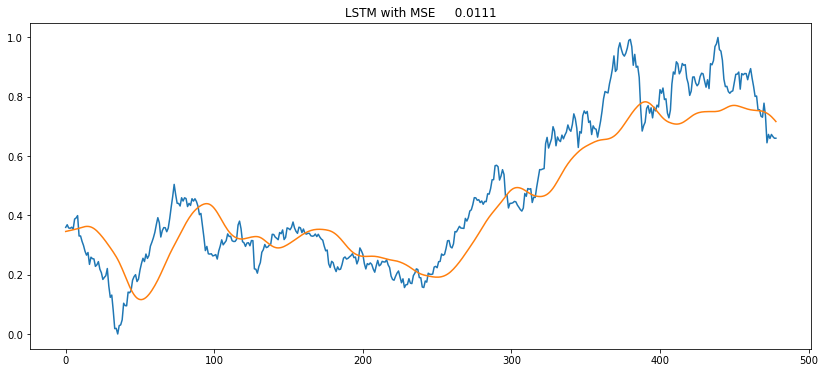

In [51]:
pred_result = {}

y_true = (y_test.reshape(-1,1))
y_pred = (model.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)

# 2. GRU Model (Gated Recurrent Unit )


In [52]:
model_GRU= Sequential([
                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],2), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],2), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],2), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, activation='tanh'),
                Dropout(0.2),

                keras.layers.Dense(units=1)])



model_GRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

model_GRU.fit(X_train, y_train,epochs=10,batch_size=150)

Epoch 1/10
1219/1219 [==============================] - 3s 3ms/step - loss: 0.1396
Epoch 2/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0523
Epoch 3/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0143
Epoch 4/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0092
Epoch 5/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 6/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0059
Epoch 7/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 8/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 9/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0050
Epoch 10/10
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0046


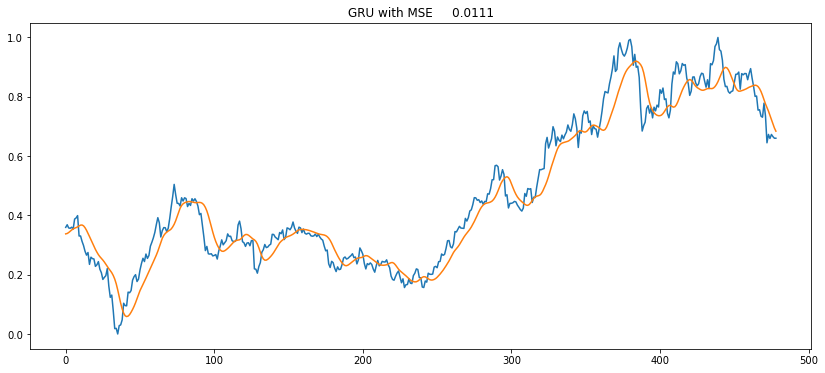

In [54]:
Close= (y_test.reshape(-1,1))
pred_close = (model_GRU.predict(X_test))
MSE= mean_squared_error(y_true, y_pred)
plt.figure(figsize=(14,6))
plt.title("GRU with MSE {:10.4f}".format(MSE))
plt.plot(Close)
plt.plot(pred_close)



# 3. MLP, MultiLayer Perceptron

C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


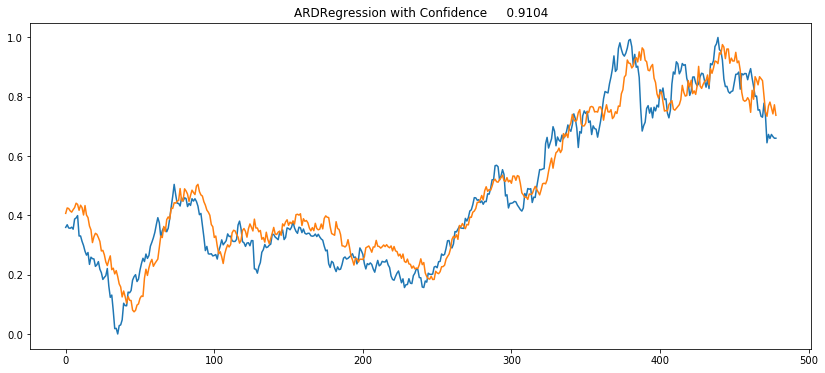

In [55]:
nsamples, nx, ny = X_train.shape
d2_X_train= X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
d2_X_test= X_test.reshape((nsamples,nx*ny))
model = MLPRegressor(random_state=1, max_iter=500).fit(d2_X_train, y_train)
name="ARDRegression"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
MSE= mean_squared_error(y_true, y_pred)
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# Forecasting with different ML models
 1. LinearRegression
 2. SVM
 3. KNeighborsRegressor
 4. DecisionTreeRegressor
 5. SGDRegressor
 6. RandomForestRegressor
 7. BayesianRidge
 8. ADARegressor

# Preparing Data for ML models

In [56]:
nsamples, nx, ny = X_train.shape
d2_X_train= X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
d2_X_test= X_test.reshape((nsamples,nx*ny))

In [57]:
ML_Models = []
ML_Models.append(('Linear Regression ', LinearRegression(n_jobs=-2)))
ML_Models.append(('DecisionTree ', DecisionTreeRegressor(random_state=20)))
ML_Models.append(('Support Vector Machine', SVR(C=2.0, epsilon=0.2))) 
ML_Models.append(('Stochastic Gradiant Descent', SGDRegressor(max_iter=1000, tol=1e-3)))
ML_Models.append(('KNeighbors', KNeighborsRegressor(n_neighbors=20)))
ML_Models.append(('Random Forest', RandomForestRegressor(max_depth=2, random_state=0)))
ML_Models.append(('BayesianRidge', linear_model.BayesianRidge()))


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time

num_folds = 10
results = []
names = []

for name, model in ML_Models:
    model.fit(d2_X_train, y_train)
    confidence = model.score(d2_X_test, y_test)
    results.append(confidence)
    print("%s => Confidence: %f " %  (name, confidence))

Linear Regression  => Confidence: 0.985676 
DecisionTree  => Confidence: 0.802852 
Support Vector Machine => Confidence: 0.749193 
Stochastic Gradiant Descent => Confidence: 0.924154 


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bidar20m\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


KNeighbors => Confidence: 0.526655 
Random Forest => Confidence: 0.724362 
BayesianRidge => Confidence: 0.987439 


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 1. LinearRegression

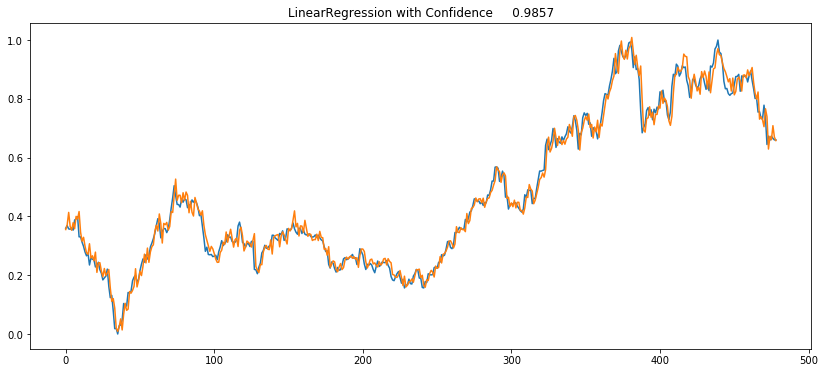

In [59]:
model=LinearRegression(n_jobs=-2)
name="LinearRegression"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 2. SVM

C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


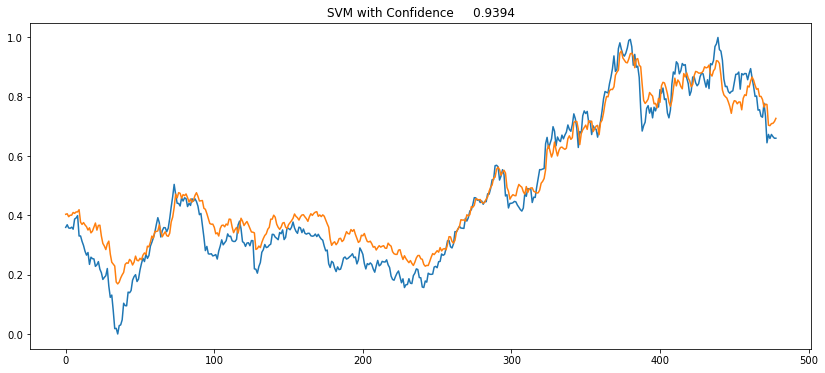

In [60]:

model=SVR(C=5.0, epsilon=0.001)
name="SVM"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 3. KNeighborsRegressor

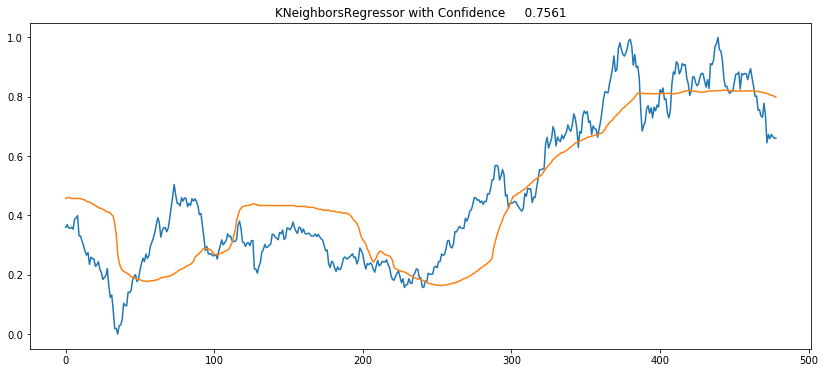

In [61]:

model= KNeighborsRegressor(n_neighbors=250)
name="KNeighborsRegressor"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 4. DecisionTreeRegressor

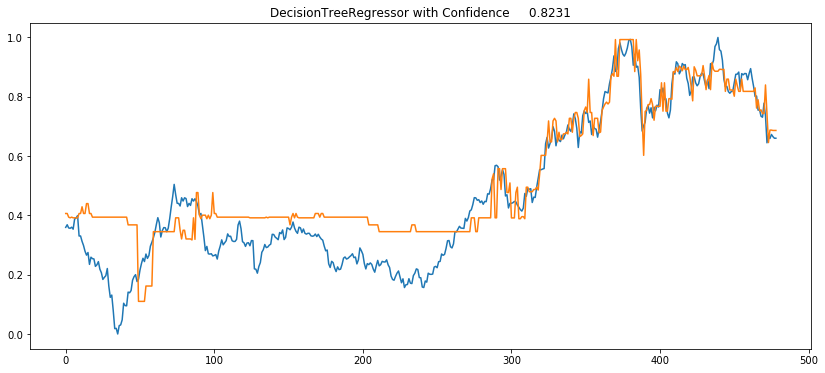

In [62]:

model=DecisionTreeRegressor(random_state=5)
name="DecisionTreeRegressor"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 5. SGDRegressor

C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


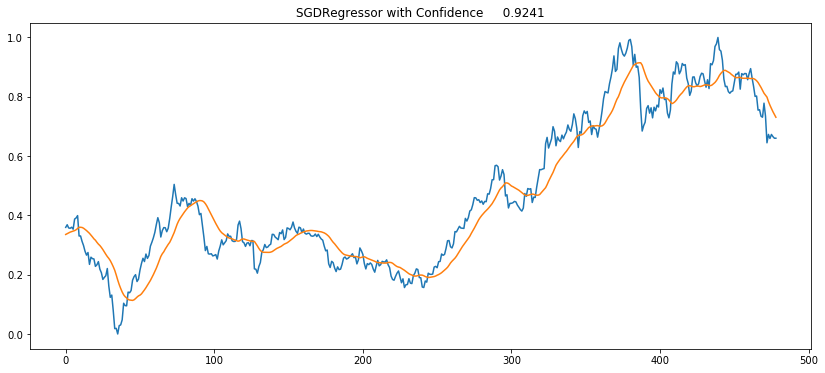

In [63]:

model= reg =SGDRegressor(max_iter=2000, tol=1e-3)
name="SGDRegressor"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 6. RandomForestRegressor 

C:\Users\bidar20m\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


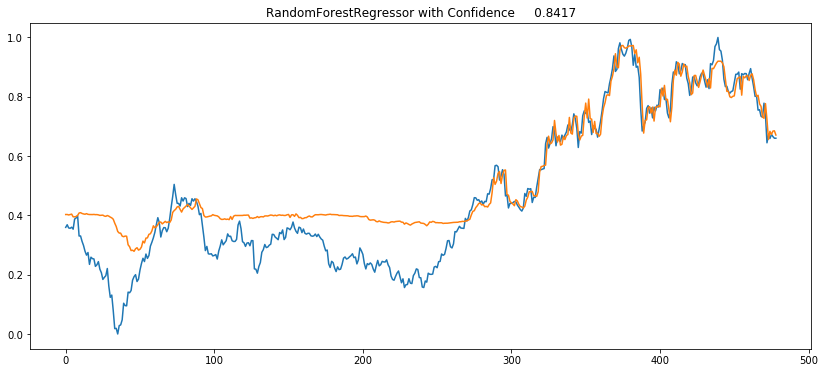

In [64]:

model =RandomForestRegressor(max_depth=8, random_state=5)
name="RandomForestRegressor"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 7. BayesianRidge

C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


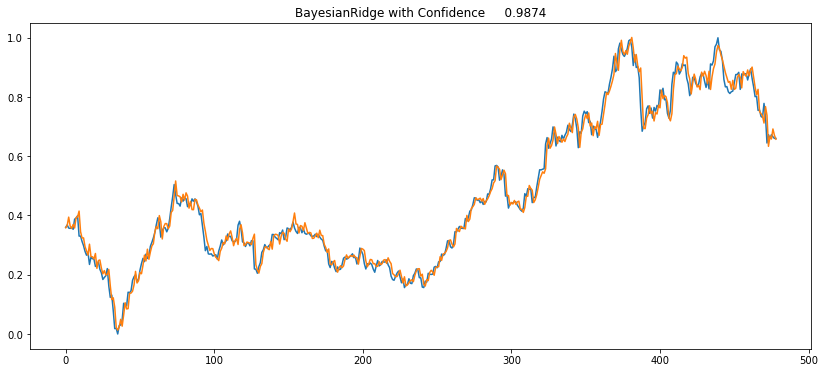

In [65]:
model= linear_model.BayesianRidge()
name="BayesianRidge"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)

# 8. ARD Regressor

C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


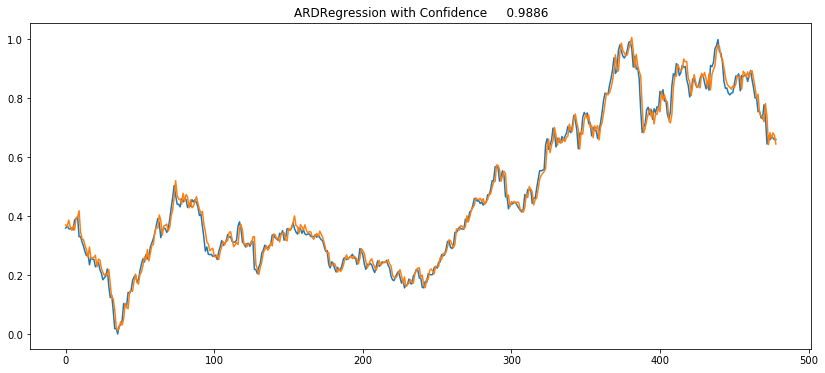

In [66]:
model= linear_model.ARDRegression()
name="ARDRegression"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))
plt.plot(Close)
plt.plot(pred_close)